Explore Statoil Iceberg Data
===

In [6]:
import os
import pathlib
from os.path import join as opj
import json

import numpy as np
import cv2
import matplotlib.pyplot as plt

project_dir = '/home/rlan/projects/kaggle/kaggle-statoil-iceberg'
train_data_path = '/home/rlan/datasets/statoil-iceberg/train.json'

### Read Training Data

In [2]:
with open(train_data_path, 'r') as f:
    train_data = json.load(f)

### Visualize One Image

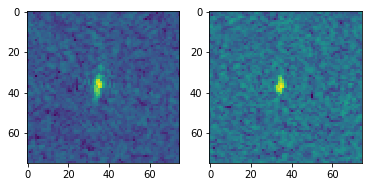

In [4]:
band1 = np.array(train_data[0]['band_1']).reshape(75, 75)
band2 = np.array(train_data[0]['band_2']).reshape(75, 75)

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.imshow(band1)
plt.subplot(1, 2, 2)
plt.imshow(band2)
plt.show()

### check the value range of the images

In [ ]:
all_band1 = np.vstack([np.vstack([np.array(x['band_1'])]) for x in train_data])
all_band2 = np.vstack([np.vstack([np.array(x['band_2'])]) for x in train_data])
print('[band 1] min: {}, max: {}'.format(all_band1.min(), all_band1.max()))
print('[band 2] min: {}, max: {}'.format(all_band2.min(), all_band2.max()))


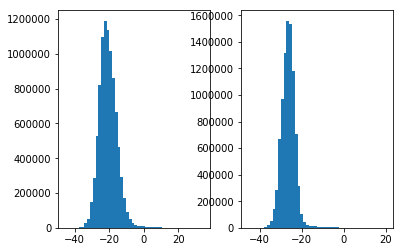

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.hist(all_band1.reshape(-1, 1), bins=50)
plt.subplot(1, 2, 2)
plt.hist(all_band2.reshape(-1, 1), bins=50)
plt.show()

### check the label

In [27]:
print(train_data[0]['id'])
print(train_data[0]['is_iceberg'])
print(train_data[0]['inc_angle'])

dfd5f913
0
43.9239


In [31]:
np.array([train_data[0]['band_1'], train_data[0]['band_1']]).shape

(2, 5625)

### Visualize Training Data (is_iceberg vs. is_not_iceberg)

In [11]:
def normalize(img):
    return (img - img.min()) / (img.max() - img.min()) * 255

pathlib.Path(opj(project_dir, 'output_images', 'iceberg')).mkdir(parents=True, exist_ok=True)
pathlib.Path(opj(project_dir, 'output_images', 'not-iceberg')).mkdir(parents=True, exist_ok=True)

for data in train_data:
    band1 = np.array(data['band_1']).reshape(75, 75)
    band2 = np.array(data['band_2']).reshape(75, 75)
    cur_id = data['id']
    is_iceberg = data['is_iceberg']
    save_dir = opj(project_dir, 'output_images', 'iceberg' if is_iceberg else 'not-iceberg')
    cv2.imwrite(opj(save_dir, '%s_band1.jpg' % cur_id), normalize(band1))
    cv2.imwrite(opj(save_dir, '%s_band2.jpg' % cur_id), normalize(band2))

In [10]:
normalize(np.array(train_data[0]['band_1']).reshape(75, 75))

array([[ 0.27193414,  0.29099295,  0.25113701, ...,  0.33259165,
         0.30850655,  0.20275585],
       [ 0.25113924,  0.27193308,  0.28166051, ...,  0.30850766,
         0.25105945,  0.17414523],
       [ 0.25113924,  0.29099295,  0.32491869, ...,  0.29091542,
         0.27185434,  0.14143428],
       ..., 
       [ 0.23997096,  0.25112259,  0.20281904, ...,  0.21580931,
         0.32482668,  0.308491  ],
       [ 0.1742106 ,  0.27191753,  0.25112148, ...,  0.28156851,
         0.29986404,  0.28156624],
       [ 0.23997096,  0.29994281,  0.29097634, ...,  0.29986515,
         0.27183882,  0.26167666]])